In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
df=pd.read_csv('/content/gdrive/My Drive/Data Projects/Purdue - Employee Turnover Analytics/HR_comma_sep.csv')

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
df=df.rename(columns={'satisfaction_level':'satisfaction',
                      'last_evaluation':'evaluation',
                      'number_project':'projectCount',
                      'average_montly_hours':'averageMonthlyHours',
                      'time_spend_company': 'yearsAtCompany',
                     'Work_accident':'workAccident',
                      'promotion_last_5years':'promotion',
                      'sales':'department',
                      'left':'turnover'
                     })

In [41]:
df.shape

(14999, 10)

In [42]:
df.head() #table based on new dataframe

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
df1 = df.drop(['salary', 'department'], axis=1) #drops salary and department columns from df1

In [44]:
round(df.turnover.value_counts(1),2)

,proportion
turnover,
0,0.76
1,0.24


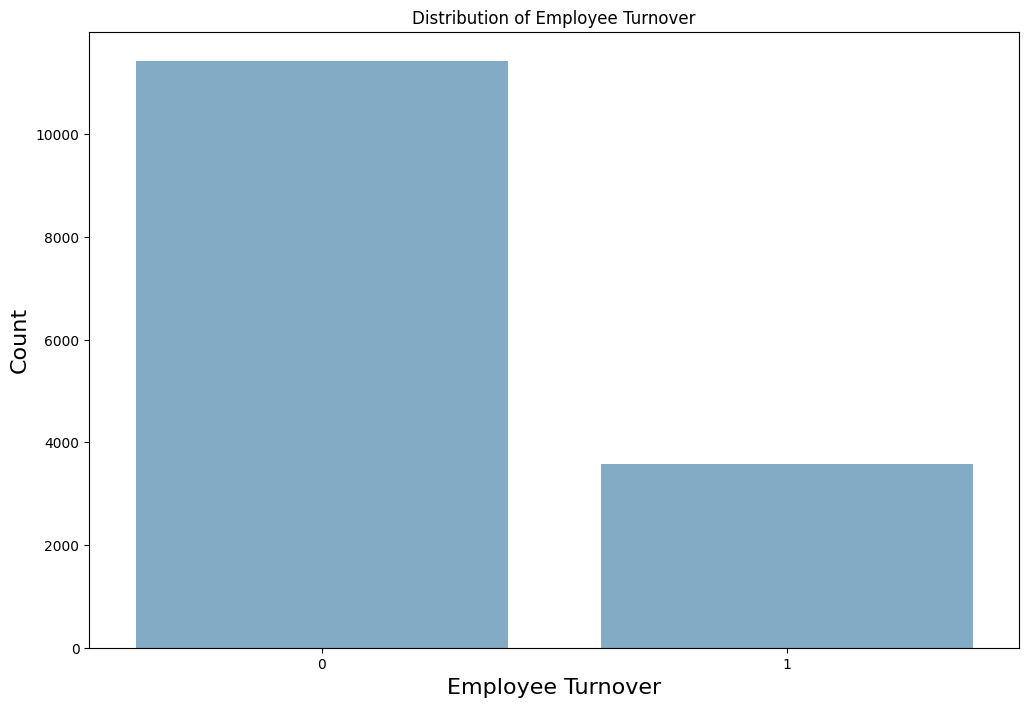

In [45]:
plt.figure(figsize=(12,8))
turnover=df.turnover.value_counts()
sns.barplot(y=turnover.values,x=turnover.index,alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show();
#bar chart displaying count of employee turnover (listed as 1)

In [46]:
df.isnull().any() #data quality checks for missing values

,0
satisfaction,False
evaluation,False
projectCount,False
averageMonthlyHours,False
yearsAtCompany,False
workAccident,False
turnover,False
promotion,False
department,False
salary,False


In [47]:
round(df.describe(),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [48]:
turnover_Summary=df1.groupby('turnover') #grouping the table into employee turnover of 0 or 1

In [49]:
turnover_Summary.mean(numeric_only=True).round(2)
#the mean for each category while grouping employees who stayed with the company vs employees who left the company.

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [50]:
turnover_Summary.std(numeric_only=True).round(2)
#the standard deviatioin for each category while grouping employees who stayed with the company vs employees who left the company.

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


In [51]:
corr=df1.corr() #displaying the correlations among each category
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


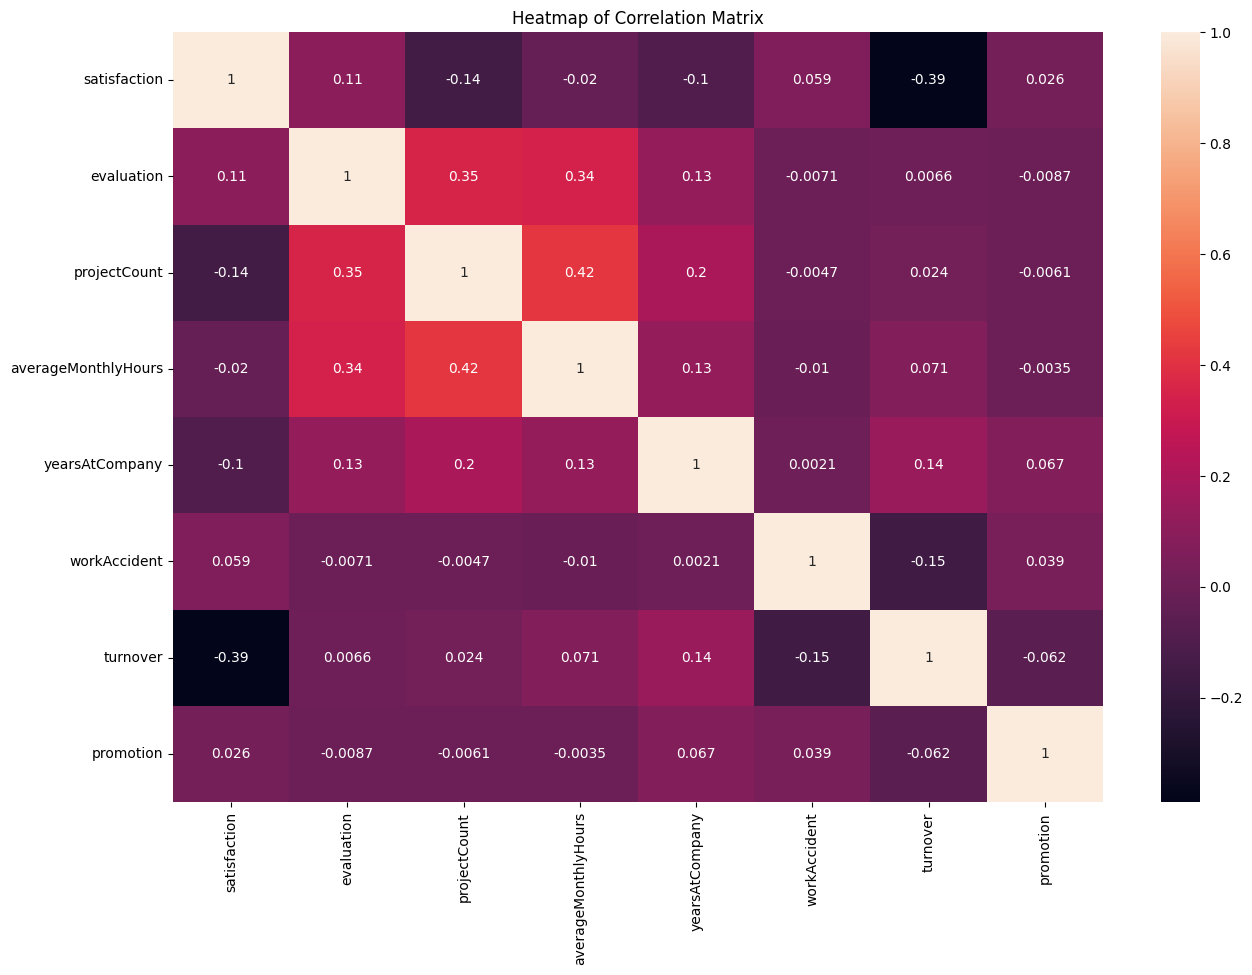

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show();
#plotting a heat map of correlation among categories

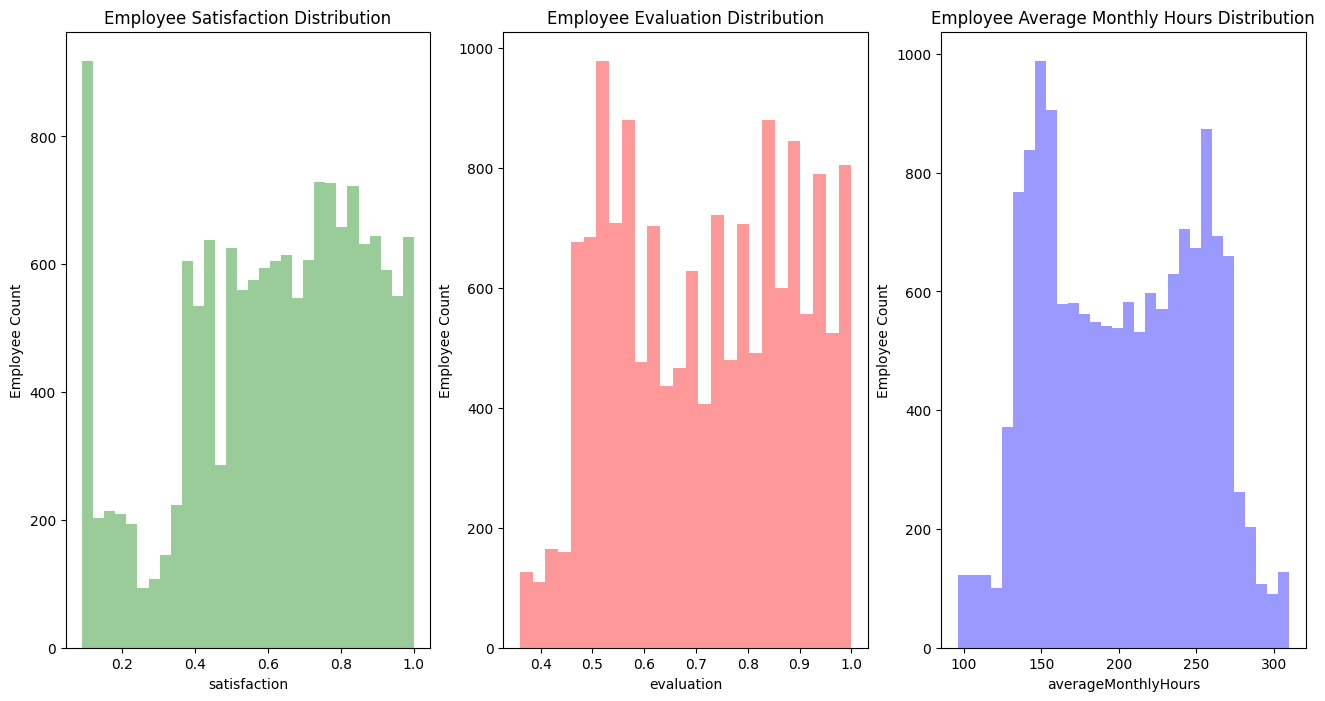

In [53]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.show();

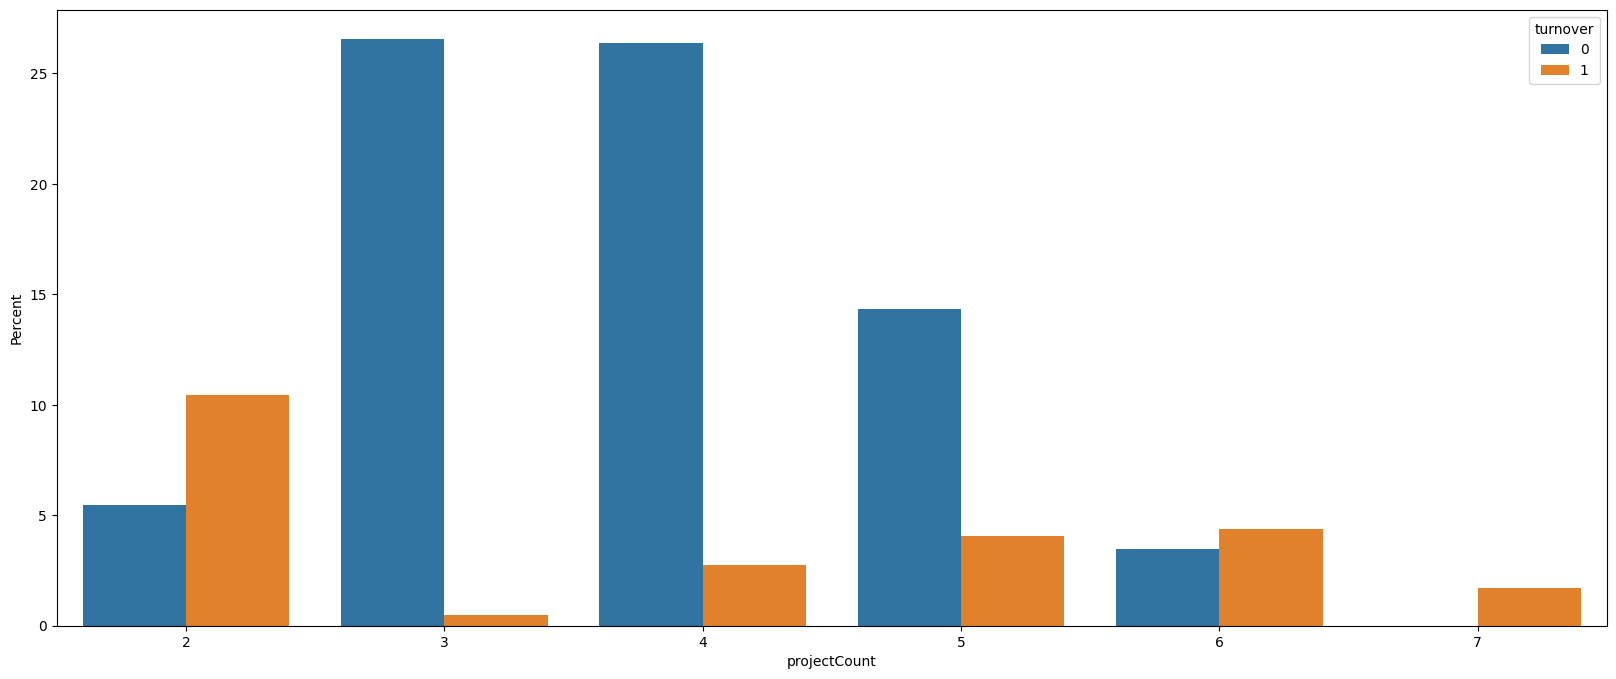

In [54]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.show();

More than half of the employees with 2, 6, or 7 projects end up leaving the company. It is likely that employees that only got assigned to 2 projects are low performing employees. The vast majority of the employees who did not leave their companies had between 3 and 5 projects. There is 100% turnover for employees with 7 projects.  The employees with 6 or 7 projects likely got burned out. There is an increase in employee turnover rate as project count increases past 3.

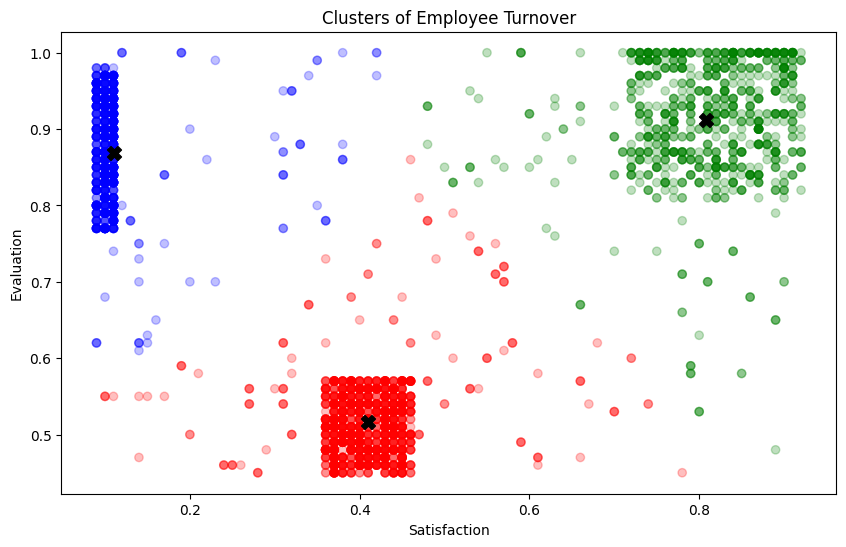

In [55]:
# Import KMeans Model
from sklearn.cluster import KMeans
# Perform clustering of employees who left based on their satisfaction and evaluation.
# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['red' if c == 0 else 'blue' if c == 2 else 'green' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show();

There are 3 distinct clusters for employees who left the company:

Cluster 1 (Blue): These are the hard-working employees with little job satisfaction. Satisfaction was less than 0.2 while evaluation was greater than 0.75.  This cluster likely represents employees who left due to burn out.

Cluster 2 (Red): These are the low-performing employees with little job satisfaction.  In this cluster, job satisfaction is between 0.35 and 0.45 while evaluations are below 0.58.  This cluster likely represents employees who left due to poor performance.

Cluster 3 (Green): These are the high-performing employees with high job satisfaction.  Satisfaction was between 0.7 and 1.0 while evaluations were greater than 0.8.  This cluster likely represents employees who left because they found a better opportunity.

In [56]:
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.38,0.53,2,157,3,0
1,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.80,0.86,5,262,6,0
2,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.11,0.88,7,272,4,0
3,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.72,0.87,5,223,5,0
4,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.37,0.52,2,159,3,0


In [57]:
new_df.shape

(14999, 21)

Next, the model will be split into a train and test set.  The model will be fit with the train set while the test set will be saved for the last evaluation.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [59]:
# Create the X and y set.
X=new_df.iloc[:,1:]
y=new_df.iloc[:,0]

# Define train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [60]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


4c. Class Imbalance

Employee turnover rate: 24%

In [61]:
round(df.turnover.value_counts(1),2)

,proportion
turnover,
0,0.76
1,0.24


In [62]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [63]:
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Perform cross-validation model training and evaluate performance.

3 Models are being trained:
*   Logistic Regression Classifier
*   Random Forest Classifier
*   Gradient Boosting Classifier

**Logistic Regression Classifier:**




In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

**Apply 5-Fold Cross Validation on Logistic Regression.**

In [66]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

np.float64(0.7792751332298928)


**Logistic Regression Classifier AUC (0.77)**


In [67]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.76      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.81      0.76      0.77      3000



**Random Forest Classifier**


In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

**Apply a 5-Fold Cross Validation on Random Forest.**

In [69]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

np.float64(0.9839665724131503)

**Random Forest Classifier AUC (0.98)**

In [70]:
from sklearn.metrics import roc_auc_score
print("\n\n ---Random Forest Model ---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model ---
Random Forest AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



**Gradient Booster Classifier**

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

**Apply a 5-Fold Cross Validation on Gradient Boosting Classifier.**



In [72]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

np.float64(0.9623612660362321)

**Gradient Boosting Classifier AUC (0.96)**

In [73]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.96      0.97      3000



**Model Evaluation (F1 Score & ROC/AUC)**

**ROC Graph**

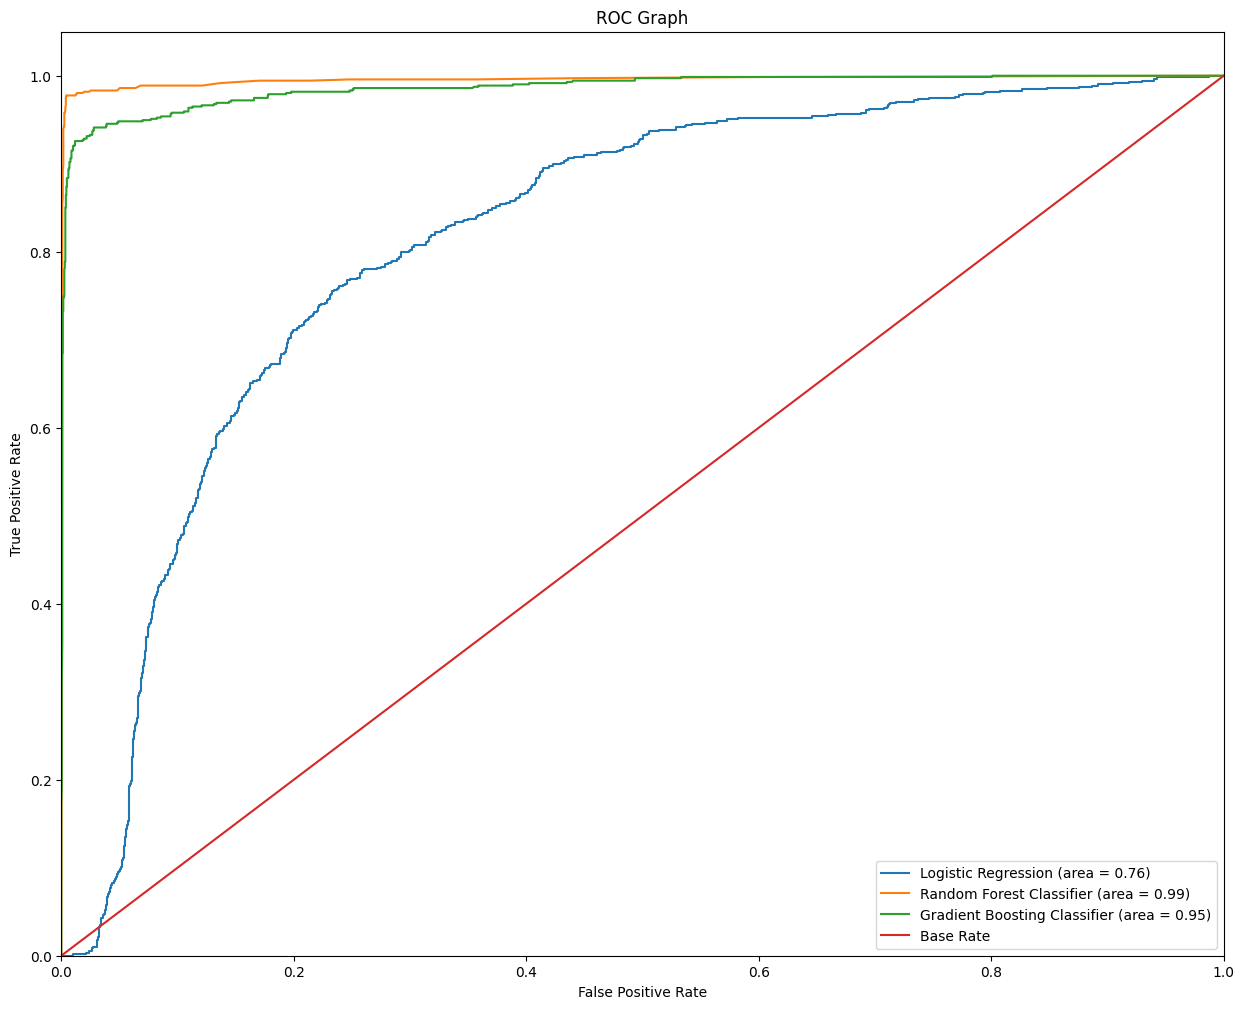

In [74]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [75]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1738,  548],
       [ 171,  543]])

In [76]:
# Confusion Matrix for GBC
confusion_matrix(y_test, gbc.predict(X_test))

array([[2230,   56],
       [  49,  665]])

In [77]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))

array([[2269,   17],
       [  16,  698]])

**Recall or Precision?**

It depends on how much cost/weight you want on your two types of errors: **False Positive** or **False Negative**.

**Recall**
High Recall implies low false negative rate.  These are used when false positives are costly.

**Precision**
High Precision implies low false positive rate.  These are used when false positives are costly.

Precision and Recall work in opposite to one another.  The higher the Recall the lower the Precision and vice versa.

*  A false positive error is a situation when Human Resources gives an employee treatment in anticipation of the employee leaving in the short haul and to later realize that the employee does not end up leaving.  This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and the emmployee, but it is a good investment for relational growth.
*  A false negative error is a situation when an emmployee leaves a company without anticipation from Human Resources.  This type of error could lead to greater setbacks than a false positive, and it could lead to more money for rehire.
*  Depending on these errors, different costs are weighed based on the type of employee being treated.  For high-salary employees, more costly forms of treatment might not be necessary.  For low-salary employees, the cost of each error are be weighed differently.

**Optimize Recall When:**
*  You want to limit false negatives
*  You will get more False Positives
*  FN > FP
*  Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
*  You want to limit false positives
*  FP > FN
*  Example: Spam VS Not Spam

While the Machine Learning model is supposed to capture as much of the turnover group as possible, the objective is to capture all of the highly probable turnover employees at the risk of flagging employees with low risk of leaving the company.

**7. Suggest various retention strategies on targeted employees.**

**7a. Using the best model, predict the probability of employee turnover in the test data.**

**Retention Plan**

In [78]:
# Ranking turnover probability for employees
rf.predict_proba(X_test)[175:185]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.86, 0.14],
       [0.06, 0.94],
       [0.17, 0.83],
       [0.93, 0.07]])

In [79]:
list(rf.predict_proba(X_test)[175:185,1])

[np.float64(0.02),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.14),
 np.float64(0.14),
 np.float64(0.94),
 np.float64(0.83),
 np.float64(0.07)]

In [80]:
list(rf.predict_proba(X_test)[175:185,1]>0.2)

[np.False_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.True_,
 np.True_,
 np.False_]

Editing Needed

Since the ROC model is being used for people, the output of this model might not be adequate.  Instead, the probability output can be used and a system can be designed to treat each employee accordingly.
* Safe Zone (Green) - Employees within this zone are considered safe.
* Low Risk Zone (Blue) - Employees within this zone should be flagged as at risk of potential turnover.  This is more of a long-term track.
* Medium Risk Zone (Orange) - Employees within this zone are at risk of turnover.  Action should be taken and monitored accordingly.
* High Risk Zone (Red) - Employees within this zone are at the highest risk of turnover.  Action should be taken immediately.

Safe Zone (Green)
* No Action required

Low Risk Zone (Blue)
* Action to be taken on long term basis
* Human Resources must track demographic data for Low Risk Zone individuals to detect variations in risk profiles and to determine necessity to change equation.

Medium Risk Zone (Orange)
* Action to be taken on medium term basis
* Human Resources must make close behavioral observations before revising turnover risk zone.

High Risk Zone (Red)
* Action to be taken on immediate basis.
* Human Resources must send list to the managers for immediate action.
* Human Resources to validate the risks for consistency with the identified clusters.
* Managers to have one-on-one discussions with the identified employee.

**Conclusion**

**What to Optimize**

Binary Classification: Turnover vs. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

Need for Application: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain t ime frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, and then allocate a limited incentive budget to the highest probability instances.

Solution 1:
*   We can rank employees by their probability of leaving, and then allocate a limited incentive budget to the highest probability instances.
*   We can allocate our incentive budget to the instances with the highest expected loss, for which we will need the probability of turnover.

Solution 2:
*  Develop learning programs for managers, then use analytics to gauge their performance and measure progress.
*  Be a good coach.  Empower the team and do not micromanage
*  Express interest for team member success
*  Have clear visioin/strategy for team
*  Help team with career development

Solution 3:
*  Evaluate the root cause of turnovers by gathering statistics based on employee satisfaction surveys.  This should give a more detailed overview of what went wrong during the employee's time with the company.

**Selection Bias**
* One thing to note about this dataset is the turnover feature.  It is unknown whether the employees that left are interns, contractors, full-time, or part-time.  These are important considerations when performing a machine learning algorithm.
* Another thing to note is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is evaluating.  If the employee knows the evaluator, then he/she will probably have a higher score.